## Modelling the attributes of Restaurants

In [99]:
import pandas as pd
import json
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the data

In [17]:
raw_data = pd.read_csv('~/6242/project/fall2018cse6242/data/phoenix_business_ws_rw_ffall_merged2.csv', skipinitialspace=True)

raw_data.head(5)

,zipcode,business_id,Mexican,American (Traditional),Pizza,American (New),Burgers,Italian,Chinese,Salad,...,median_income,median_age,under_18,above_18,walkscore,ffall,stars,review_count,ffall_category,CuisineCombined
0,85007,_c3ixq9jYKxhLUB0czi0ug,0,0,0,0,1,0,0,0,...,27557,35.0,3652,8906,60.0,987,4.0,277,4,14
1,85033,3ByGQOVgds2YEu6kzl-XEQ,0,1,0,0,0,0,0,0,...,35571,25.0,20177,32843,43.0,12,2.5,3,0,11
2,85033,CeuTRtwsq6w5rztGOyNMPg,1,0,0,0,0,0,0,0,...,35571,25.0,20177,32843,43.0,20,2.5,14,0,1
3,85033,AcGRSWCpb7YB95MTsHlGEw,0,0,1,0,0,0,0,0,...,35571,25.0,20177,32843,43.0,3,2.0,4,0,3
4,85023,cKRMmytHxaSt8F0SMEzKqg,1,0,0,0,0,0,0,1,...,51483,34.8,7731,23472,36.0,840,3.5,230,4,9


All the available attibutes in the given dataset. 

## Model Building

In [90]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

dframe = raw_data

In [91]:
dframe['totalStars'] = dframe['review_count'] * dframe['stars']

train, test = train_test_split(dframe, test_size=0.05)
dframe['totalStars'].head()


0    1108.0
1       7.5
2      35.0
3       8.0
4     805.0
Name: totalStars, dtype: float64

In [92]:
X_train = train.drop(columns=['zipcode','business_id','ffall_category','CuisineCombined','total_pop','male','female','under_18','above_18','occupied_housing_units', 'review_count', 'stars', 'ffall', 'totalStars', 'zipcode.1', 'median_age', 'walkscore'])
y_train = train['ffall']

X_train.head()
y_train.head()

X_test = test.drop(columns=['zipcode','business_id','ffall_category','CuisineCombined','total_pop','male','female','under_18','above_18','occupied_housing_units', 'review_count', 'stars', 'ffall', 'totalStars', 'zipcode.1','median_age', 'walkscore'])
y_test = test['ffall']

## Random Forrest Model

In [93]:
from sklearn.ensemble import RandomForestRegressor


In [94]:
X_train.columns

Index(['Mexican', 'American (Traditional)', 'Pizza', 'American (New)',
       'Burgers', 'Italian', 'Chinese', 'Salad', 'Sports Bars', 'Seafood',
       'Japanese', 'Barbeque', 'Mediterranean', 'Sushi Bars', 'Asian Fusion',
       'Steakhouses', 'Greek', 'Tex-Mex', 'Thai', 'Vietnamese', 'Indian',
       'Middle Eastern', 'Southern', 'Latin American', 'Hawaiian', 'Korean',
       'French', 'Caribbean', 'Pakistani', 'Ramen', 'New Mexican Cuisine',
       'Modern European', 'Spanish', 'African', 'Cantonese', 'Persian/Iranian',
       'Filipino', 'Cuban', 'Mongolian', 'Lebanese', 'Polish', 'Taiwanese',
       'German', 'Turkish', 'Ethiopian', 'Brazilian', 'Afghan', 'white_pop',
       'afam_pop', 'amindian_pop', 'asian_pop', 'hawaiian_pop', 'other_race',
       'median_income'],
      dtype='object')

In [95]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [96]:
rf.fit(X_train, y_train);
predictions = rf.predict(X_train)
errors = abs(predictions - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 245.8 degrees.


In [97]:
#printedtest = pd.DataFrame.empty
#printedtest = pd.DataFrame(predictions-y_test)
#printedtest['y'] = y_test

#print(printedtest)

In [98]:
#RSS calculation
y_mean = np.mean(y_train)

ssr = np.sum((predictions-y_train)**2)
sst = np.sum((y_train-y_mean)**2)

print(ssr)
print(sst)

r = 1- ssr/sst

print(r)

# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / y_test)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

727407784.7960036
1508025833.042117
0.5176423580698116


In [35]:
 X_train.columns

Index(['Mexican', 'American (Traditional)', 'Pizza', 'American (New)',
       'Burgers', 'Italian', 'Chinese', 'Salad', 'Sports Bars', 'Seafood',
       'Japanese', 'Barbeque', 'Mediterranean', 'Sushi Bars', 'Asian Fusion',
       'Steakhouses', 'Greek', 'Tex-Mex', 'Thai', 'Vietnamese', 'Indian',
       'Middle Eastern', 'Southern', 'Latin American', 'Hawaiian', 'Korean',
       'French', 'Caribbean', 'Pakistani', 'Ramen', 'New Mexican Cuisine',
       'Modern European', 'Spanish', 'African', 'Cantonese', 'Persian/Iranian',
       'Filipino', 'Cuban', 'Mongolian', 'Lebanese', 'Polish', 'Taiwanese',
       'German', 'Turkish', 'Ethiopian', 'Brazilian', 'Afghan', 'white_pop',
       'afam_pop', 'amindian_pop', 'asian_pop', 'hawaiian_pop', 'other_race',
       'median_income', 'median_age', 'walkscore'],
      dtype='object')

In [100]:
from sklearn.tree import export_graphviz
import pydot
import graphviz
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

AttributeError: module 'os' has no attribute 'errno'

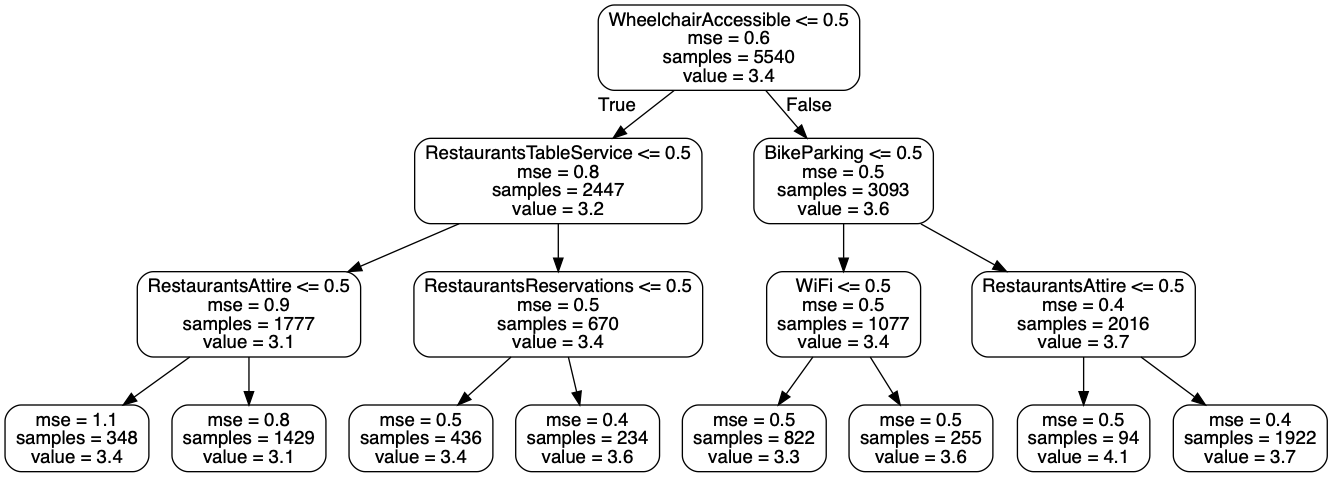

In [398]:
from IPython.display import Image
Image(filename = 'tree.png')